<a href="https://colab.research.google.com/github/szhang004/Wild-Fire-Detection/blob/main/Wild_Fire_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Giving Colab access to the Drive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/CAIS++/Smoke Detection Thematic Project/

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1F6OOMZRj-jY-X4M4JBjXoZjPRdBqfsuq/Smoke Detection Thematic Project


In [ ]:
#@title
# open training data
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

file_path = '/content/drive/My Drive/CAIS++/Smoke Detection Thematic Project/data/Wildfire Smoke.v1-raw.yolov4pytorch/valid/_annotations.txt'
directory = '/content/drive/My Drive/CAIS++/Smoke Detection Thematic Project/data/Wildfire Smoke.v1-raw.yolov4pytorch/valid'

train_raw_data = {}
train_processed = {}

with open(file_path) as file:
  for line in file:
    train_raw_data[line[:line.index(" ")]] = line[line.index(" ")+1:].split(',')[:-1]

print(len(train_raw_data))

processed_file_path = '/content/drive/My Drive/CAIS++/Smoke Detection Thematic Project/data/Processed_Valid_Data/'

imcounter = 0
counter = 0

for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
  if os.path.isfile(f) and filename.startswith('c'):
    img = Image.open(f)
    imcounter = imcounter + 1
    # dimensions 640 by 480
    data = np.asarray(img)
    h, w, c = data.shape
    width_cutoff = w//2
    s1 = data[:, :width_cutoff]
    s2 = data[:, width_cutoff:]

    if (int(train_raw_data[filename][0]) < width_cutoff):
      plt.imsave(processed_file_path + filename[:-4] + "1_fire.jpg", s1)
      counter = counter + 1
    else:
      plt.imsave(processed_file_path + filename[:-4] + "1_none.jpg", s1)
      counter = counter + 1   
    if (int(train_raw_data[filename][2]) > width_cutoff):
      plt.imsave(processed_file_path + filename[:-4] + "2_fire.jpg", s2)
      counter = counter + 1
    else:
      plt.imsave(processed_file_path + filename[:-4] + "2_none.jpg", s2)
      counter = counter + 1
  
print(imcounter)
print(counter)


147
147
294


In [ ]:
import os
print(len(os.listdir('/content/drive/My Drive/CAIS++/Smoke Detection Thematic Project/data/Processed_Valid_Data/None/')))

117


In [ ]:
#@title
import optparse

directory = '/content/drive/My Drive/CAIS++/Smoke Detection Thematic Project/data/Processed_Training_Data/'

for filename in os.listdir(directory):
  print(filename)
  if "none" in filename:
    os.rename(directory+filename, directory+"None/"+filename)
  if "fire" in filename:
    os.rename(directory+filename, directory+"Fire/"+filename)


ck0qd4sisfz1x0863riapvr9k_jpeg.rf.0d074512f215ea0855dc51c3be17779f1_fire.jpg
ck0qd4sisfz1x0863riapvr9k_jpeg.rf.0d074512f215ea0855dc51c3be17779f2_fire.jpg
ck0nfz8fe60yr0838az9x331y_jpeg.rf.152d851a0f20d6f573a9f6f250204a9c1_fire.jpg
ck0nfz8fe60yr0838az9x331y_jpeg.rf.152d851a0f20d6f573a9f6f250204a9c2_fire.jpg
ck0txdhj9wk390721me7hmajn_jpeg.rf.0b9072848081252656285ddaab966c7a1_fire.jpg
ck0txdhj9wk390721me7hmajn_jpeg.rf.0b9072848081252656285ddaab966c7a2_fire.jpg
ck0ujxg4qyroe0721yt57ymqa_jpeg.rf.0c16dbb547f7c6d169dbb0234e411afd1_none.jpg
ck0ujxg4qyroe0721yt57ymqa_jpeg.rf.0c16dbb547f7c6d169dbb0234e411afd2_fire.jpg
ck0qd7cyiib8f0701npyn63rc_jpeg.rf.0d08de7a03fcfca3e485ed18091f4b191_none.jpg
ck0qd7cyiib8f0701npyn63rc_jpeg.rf.0d08de7a03fcfca3e485ed18091f4b192_fire.jpg
ck0nfnbw45srt083889319uj8_jpeg.rf.091dbaf5088a42db9bfecf39178eeebc1_fire.jpg
ck0nfnbw45srt083889319uj8_jpeg.rf.091dbaf5088a42db9bfecf39178eeebc2_none.jpg
ck0t4kdl1nlyb07011sj8qjd8_jpeg.rf.0a712e797adaffd2ba69b30c0005fe831_fire.jpg

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 16.8 MB/s 


In [ ]:
import torch.nn as nn
from torchvision import transforms, datasets
import torch.optim as optim
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
import numpy as np
import os

import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import time
import copy
from torchvision import datasets, models, transforms

from torchmetrics import ConfusionMatrix


In [ ]:
valid_data_dir = r'/content/drive/My Drive/CAIS++/Smoke Detection Thematic Project/data/Wildfire Smoke.v1-raw.yolov4pytorch/valid'
train_data_dir = r'/content/drive/My Drive/CAIS++/Smoke Detection Thematic Project/data/Wildfire Smoke.v1-raw.yolov4pytorch/train'
test_data_dir = r'/content/drive/My Drive/CAIS++/Smoke Detection Thematic Project/data/Wildfire Smoke.v1-raw.yolov4pytorch/test'

directories = [valid_data_dir, train_data_dir, test_data_dir]

rgb = {"r":[], "g":[], "b":[]}

for directory in directories:
  for filename in os.listdir(directory):
    f= os.path.join(directory, filename)
    if os.path.isfile(f):
      if not filename[0] == "_":
        img = Image.open(f)
        # dimensions 640 by 480
        data = np.asarray(img)
        data = np.swapaxes(data, 0,2)

        c,h,w = data.shape
        data = data.reshape(-1, h*w)

        for index,k in enumerate(rgb.keys()):
          rgb[k]=rgb[k]+data[index].tolist()

# stacked = np.vstack([rgb["r"], rgb["g"], rgb["b"]])
# print(stacked.size)


KeyboardInterrupt: ignored

In [ ]:
r_std = np.std(rgb["r"])
g_std = np.std(rgb["g"])
b_std = np.std(rgb["b"])

r_mean = np.mean(rgb["r"])
g_mean = np.mean(rgb["g"])
b_mean = np.mean(rgb["b"])

normalize_mean = (r_mean/255, g_mean/255, b_mean/255)
normalize_std = (r_std/255, g_std/255, b_std/255)

KeyboardInterrupt: ignored

In [ ]:
print(normalize_mean)
print(normalize_std)

(109.25825267789307, 116.46286943178183, 128.88798684144632)
(54.269946772031666, 58.04371729089041, 71.18820872545112)


In [ ]:
batch_size = 32

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((109.25825267789307, 116.46286943178183, 128.88798684144632), (54.269946772031666, 58.04371729089041, 71.18820872545112))]) #Note: ????

train_data_dir = r'/content/drive/My Drive/CAIS++/Smoke Detection Thematic Project/data/Processed_Training_Data'
test_data_dir = r'/content/drive/My Drive/CAIS++/Smoke Detection Thematic Project/data/Processed_Testing_Data/'
valid_data_dir = r'/content/drive/My Drive/CAIS++/Smoke Detection Thematic Project/data/Valid_Testing_Data/'

train_dataset = datasets.ImageFolder(train_data_dir, transform=transform)
valid_dataset = datasets.ImageFolder(train_data_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_data_dir, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle = True)

data_loaders = {"train":train_loader, "valid":valid_loader}
dataset_sizes = {"train":len(train_dataset), "valid":len(valid_dataset)}

class_names = ['fire','none']

test_dataset


Dataset ImageFolder
    Number of datapoints: 148
    Root location: /content/drive/My Drive/CAIS++/Smoke Detection Thematic Project/data/Processed_Testing_Data/
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(109.25825267789307, 116.46286943178183, 128.88798684144632), std=(54.269946772031666, 58.04371729089041, 71.18820872545112))
           )

In [ ]:
# use GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



In [ ]:
# load the resnet model

############### YOUR CODE STARTS HERE ###############
model_ft = models.resnet18(pretrained=True)

# find the input size of the FC layers
num_features = model_ft.fc.in_features
# modify the FC layer to output 2, and the input should be...?
model_ft.fc = nn.Linear(num_features, 2)

# save model to device
model_ft = model_ft.to(device)

# define loss for classification
criterion = nn.CrossEntropyLoss() # Binary problem (x) 


# define whatever optimizer you want! (TODO: Fill in ____ and blanks)
optimizer_ft = optim.Adam(model_ft.parameters())
############### YOUR CODE ENDS HERE ###############

# decay your learning rate across epochs-- this helps our model converge better and prevents overshooting a local minima
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
# Train model definition
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            print_frequency = 10
            for index, (inputs, labels) in enumerate(data_loaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                # if index % print_frequency == 0:
                #   print(f"{index} loss: {running_loss}")

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
# Call the train model function
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.6134 Acc: 0.6793
valid Loss: 1.0817 Acc: 0.4012

Epoch 1/9
----------
train Loss: 0.2883 Acc: 0.8866
valid Loss: 25.1958 Acc: 0.5988

Epoch 2/9
----------
train Loss: 0.1735 Acc: 0.9360
valid Loss: 6.7119 Acc: 0.5988

Epoch 3/9
----------
train Loss: 0.1667 Acc: 0.9370
valid Loss: 2.3707 Acc: 0.4012

Epoch 4/9
----------
train Loss: 0.1275 Acc: 0.9486
valid Loss: 0.7249 Acc: 0.4012

Epoch 5/9
----------
train Loss: 0.0833 Acc: 0.9651
valid Loss: 4.9585 Acc: 0.5988

Epoch 6/9
----------
train Loss: 0.0833 Acc: 0.9612
valid Loss: 1.4089 Acc: 0.5988

Epoch 7/9
----------
train Loss: 0.0843 Acc: 0.9671
valid Loss: 0.8953 Acc: 0.6405

Epoch 8/9
----------
train Loss: 0.0476 Acc: 0.9787
valid Loss: 0.1131 Acc: 0.9545

Epoch 9/9
----------
train Loss: 0.0477 Acc: 0.9777
valid Loss: 0.0655 Acc: 0.9690

Training complete in 7m 25s
Best val Acc: 0.968992


In [ ]:
target = torch.tensor([1,1,0,0])
preds = torch.tensor([0,1,0,0])
confmat = ConfusionMatrix(num_classes=2)
confmat(preds, target)

tensor([[2, 0],
        [1, 1]])

[[[20.839241 20.840605 20.840036 ... 20.841629 20.841629 20.841629]
  [20.840036 20.840036 20.840492 ... 20.841629 20.841629 20.841629]
  [20.838102 20.837988 20.839867 ... 20.841629 20.841629 20.841629]
  ...
  [20.838102 20.838102 20.838102 ... 20.841003 20.839867 20.839468]
  [20.838102 20.838102 20.838102 ... 20.840435 20.839695 20.83998 ]
  [20.838102 20.838102 20.838102 ... 20.841743 20.84072  20.840605]]

 [[22.71598  22.717276 22.716736 ... 22.719164 22.719164 22.719164]
  [22.716682 22.716682 22.717113 ... 22.719164 22.719164 22.719164]
  [22.714848 22.714739 22.71652  ... 22.719164 22.719164 22.719164]
  ...
  [22.714901 22.714901 22.714901 ... 22.717329 22.71625  22.715872]
  [22.714901 22.714901 22.714901 ... 22.71679  22.71598  22.71625 ]
  [22.714901 22.714901 22.714901 ... 22.717924 22.716951 22.716845]]

 [[41.45845  41.459866 41.459274 ... 41.46699  41.46699  41.46699 ]
  [41.459335 41.459335 41.459805 ... 41.46699  41.46699  41.46699 ]
  [41.458275 41.458275 41.459274

[[[20.850904 20.850904 20.850904 ... 20.846125 20.84624  20.841574]
  [20.850792 20.850792 20.850792 ... 20.846067 20.846865 20.843565]
  [20.85062  20.85062  20.85062  ... 20.841402 20.84254  20.84089 ]
  ...
  [20.84146  20.84106  20.840946 ... 20.83941  20.839752 20.83981 ]
  [20.841686 20.841232 20.841118 ... 20.839695 20.840208 20.840378]
  [20.841516 20.841345 20.841516 ... 20.840036 20.840776 20.84106 ]]

 [[22.72737  22.727316 22.727262 ... 22.72262  22.722727 22.718302]
  [22.727262 22.727207 22.7271   ... 22.722565 22.72332  22.72019 ]
  [22.727045 22.727045 22.726938 ... 22.71814  22.71922  22.717653]
  ...
  [22.717815 22.717438 22.717329 ... 22.716143 22.716467 22.71652 ]
  [22.71803  22.7176   22.717491 ... 22.716412 22.716898 22.71706 ]
  [22.717869 22.717707 22.717869 ... 22.716736 22.717438 22.717707]]

 [[41.468643 41.46882  41.46923  ... 41.466343 41.46646  41.46163 ]
  [41.468525 41.46882  41.46923  ... 41.466167 41.46699  41.463577]
  [41.468407 41.468643 41.469173

[[[20.839354 20.840605 20.83998  ... 20.8418   20.8418   20.8418  ]
  [20.840094 20.840036 20.840435 ... 20.8418   20.8418   20.8418  ]
  [20.838102 20.837988 20.839867 ... 20.8418   20.8418   20.8418  ]
  ...
  [20.837933 20.837933 20.837933 ... 20.842028 20.840776 20.83981 ]
  [20.837933 20.837933 20.837933 ... 20.840834 20.838387 20.840263]
  [20.837933 20.837933 20.837933 ... 20.840492 20.839867 20.841003]]

 [[22.716087 22.717276 22.716682 ... 22.719597 22.719597 22.719597]
  [22.716736 22.716682 22.71706  ... 22.719597 22.719597 22.719597]
  [22.714848 22.714739 22.71652  ... 22.719597 22.719597 22.719597]
  ...
  [22.714848 22.714848 22.714848 ... 22.718193 22.717007 22.716087]
  [22.714848 22.714848 22.714848 ... 22.71706  22.714685 22.716412]
  [22.714848 22.714848 22.714848 ... 22.716627 22.716034 22.717113]]

 [[41.45857  41.459866 41.459217 ... 41.4677   41.4677   41.4677  ]
  [41.459393 41.459335 41.459747 ... 41.4677   41.4677   41.4677  ]
  [41.458275 41.458275 41.459274

[[[20.839012 20.840834 20.840263 ... 20.84146  20.84146  20.84146 ]
  [20.840263 20.83981  20.840208 ... 20.84146  20.84146  20.84146 ]
  [20.838387 20.837988 20.83958  ... 20.84146  20.84146  20.84146 ]
  ...
  [20.83816  20.83816  20.838102 ... 20.840605 20.839924 20.839695]
  [20.83816  20.83816  20.83816  ... 20.83998  20.839695 20.840094]
  [20.83816  20.83816  20.83816  ... 20.8418   20.841175 20.840208]]

 [[22.715765 22.717491 22.716951 ... 22.719273 22.719273 22.719273]
  [22.716898 22.716467 22.716845 ... 22.719273 22.719273 22.719273]
  [22.715117 22.714739 22.71625  ... 22.719273 22.719273 22.719273]
  ...
  [22.714954 22.714954 22.714901 ... 22.716898 22.71625  22.716034]
  [22.714954 22.714954 22.714954 ... 22.716305 22.71598  22.716358]
  [22.714954 22.714954 22.714954 ... 22.717978 22.717384 22.716467]]

 [[41.458275 41.460102 41.45951  ... 41.46699  41.46699  41.46699 ]
  [41.45957  41.4591   41.45951  ... 41.46699  41.46699  41.46699 ]
  [41.458275 41.458275 41.45898 

[[[20.850279 20.849937 20.849653 ... 20.841858 20.846182 20.844702]
  [20.850336 20.85011  20.849825 ... 20.84015  20.846067 20.840378]
  [20.85062  20.850508 20.850336 ... 20.841003 20.841574 20.84055 ]
  ...
  [20.845955 20.844986 20.845499 ... 20.83816  20.838217 20.838217]
  [20.843962 20.84362  20.843735 ... 20.83816  20.83816  20.83816 ]
  [20.844248 20.844759 20.844248 ... 20.83833  20.838272 20.838272]]

 [[22.726236 22.725912 22.725641 ... 22.71857  22.722673 22.72127 ]
  [22.72629  22.726074 22.725803 ... 22.716951 22.722565 22.717167]
  [22.72656  22.726452 22.726236 ... 22.717762 22.718302 22.717329]
  ...
  [22.722511 22.721594 22.72208  ... 22.715063 22.715117 22.715117]
  [22.72046  22.720137 22.720243 ... 22.715063 22.715063 22.715063]
  [22.72073  22.721216 22.72073  ... 22.715225 22.715172 22.715172]]

 [[41.467934 41.467583 41.467403 ... 41.461926 41.466404 41.46487 ]
  [41.467995 41.467876 41.467583 ... 41.46016  41.466286 41.460396]
  [41.468407 41.46829  41.46817 

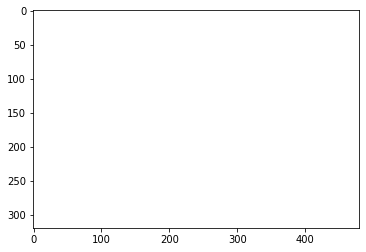

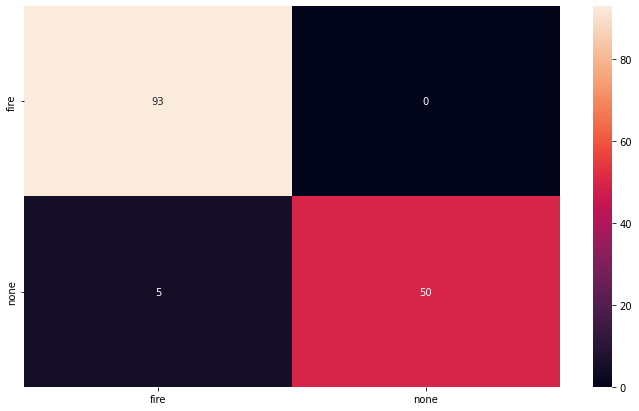

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

mean = (109.25825267789307, 116.46286943178183, 128.88798684144632)
std = (54.269946772031666, 58.04371729089041, 71.18820872545112)

def normal_dist(x, mean, sd):
  prob_density = (np.pi*sd) * np.exp(-.5*((x-mean)/sd)**2)
  return prob_density

# iterate over test data
for inputs, labels in test_loader:
        inputs = inputs.to(device)
        output = model_ft(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

        for i, label in enumerate(labels):
          if not output[i] == label:
            data = np.asarray(inputs[i].cpu())
            for index, channel in enumerate(data):
              for row in range(480):
                for col in range(320):
                  data[index][row][col] = normal_dist(data[index][row][col], mean[index], std[index])
            print(data)
            data = np.swapaxes(data, 0,2)
            plt.imshow(data)

# constant for classes
classes = ('fire','none')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(data_loaders['valid']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            print(labels)

            outputs = model(inputs)

            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
# https://towardsdatascience.com/saliency-map-using-pytorch-68270fe45e80
def visualize_saliency(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(data_loaders['valid']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            print(labels)

            outputs = model(inputs)

            output_idx = outputs.argmax()
            output_max = outputs[0, output_idx]

            output_max.backward()

            # Retireve the saliency map and also pick the maximum value from channels on each pixel.
            # In this case, we look at dim=1. Recall the shape (batch_size, channel, width, height)
            saliency, _ = torch.max(X.grad.data.abs(), dim=32) 
            saliency = saliency.reshape(320, 480)

            # Reshape the image
            image = image.reshape(-1, 320, 480)

            # Visualize the image and the saliency map
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(image.cpu().detach().numpy().transpose(1, 2, 0))
            ax[0].axis('off')
            ax[1].imshow(saliency.cpu(), cmap='hot')
            ax[1].axis('off')
            plt.tight_layout()
            fig.suptitle('The Image and Its Saliency Map')
            plt.show()

        model.train(mode=was_training)

In [ ]:
visualize_saliency(model_ft)

tensor([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 1, 1, 1], device='cuda:0')


IndexError: ignored

<Figure size 432x288 with 0 Axes>

tensor([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0], device='cuda:0')


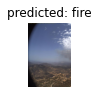

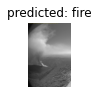

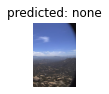

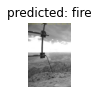

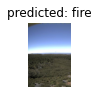

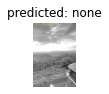

In [ ]:
visualize_model(model_ft)

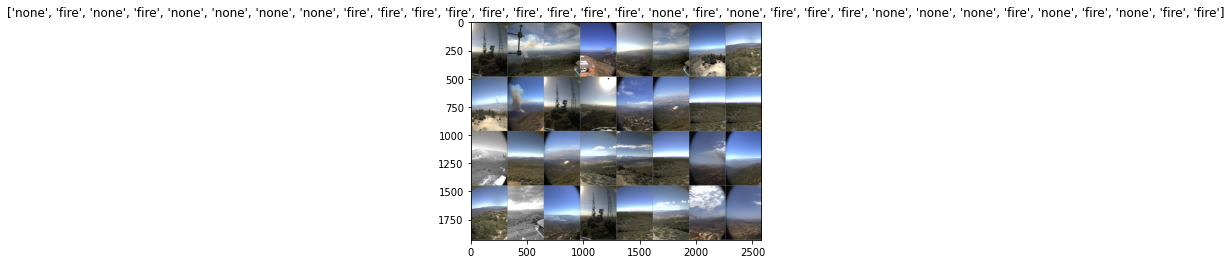

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(data_loaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
one = 0
zero = 0

for inputs, classes in iter(data_loaders['train']):
  for c in classes:
    if c == 1:
      one += 1
    else:
      zero += 1

print(zero) # Fire
print(one) # None

618
414
